In [4]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data_df = pd.merge(ride_data, city_data,
                                 how='left', on='city')
# Display the data table for preview
combined_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [5]:
# Obtain the x and y coordinates for each of the three city types
# For type Urban and grouped by city
pyber_city_U = combined_data_df.loc[combined_data_df["type"] == "Urban"].groupby([combined_data_df["city"]])


# For type Rural and grouped by city
pyber_city_R = combined_data_df.loc[combined_data_df["type"] == "Rural"].groupby([combined_data_df["city"]])


# For type Suburban and grouped by city
pyber_city_S = combined_data_df.loc[combined_data_df["type"] == "Suburban"].groupby([combined_data_df["city"]])


In [6]:
# Calculation for city type Urban
fare_urban = pyber_city_U["fare"].mean()
ride_urban = pyber_city_U["ride_id"].count()
driver_urban = pyber_city_U["driver_count"].mean()

# Calculation for city type Rural
fare_rural = pyber_city_R["fare"].mean()
ride_rural = pyber_city_R["ride_id"].count()
driver_rural = pyber_city_R["driver_count"].mean()

# Calculation for city type Suburban
fare_suburban = pyber_city_S["fare"].mean()
ride_suburban = pyber_city_S["ride_id"].count()
driver_suburban = pyber_city_S["driver_count"].mean()

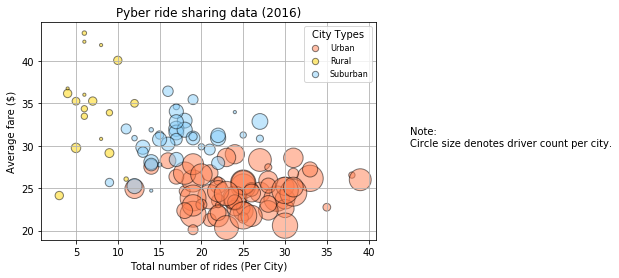

In [11]:
# Build the scatter plots for each city types
plt.scatter(ride_urban, fare_urban, label = "Urban", s=driver_urban * 10, color=["coral"], edgecolor="black", alpha = 0.5, marker="o")
plt.scatter(ride_rural, fare_rural, label = "Rural", s=driver_rural * 10, color=["gold"], edgecolor="black", alpha = 0.5, marker="o")
plt.scatter(ride_suburban, fare_suburban, label = "Suburban", s=driver_suburban  * 10, color=["lightskyblue"], edgecolor="black", alpha = 0.5, marker="o")
plt.grid()

# Incorporate the other graph properties
plt.title("Pyber ride sharing data (2016)")
plt.xlabel("Total number of rides (Per City)")
plt.ylabel("Average fare ($)")

# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 

legend.legendHandles[0]._sizes = [40]
legend.legendHandles[1]._sizes = [40]
legend.legendHandles[2]._sizes = [40]

# Incorporate a text label regarding circle size
plt.text(45,30, "Note: \nCircle size denotes driver count per city.", fontsize = 10)

# Save Figure
plt.savefig("Images/Pyber.png")

# Show plot
plt.show()

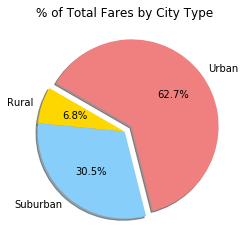

In [18]:
# Calculate Type Percents
# Total Fares by City Type
type_percent = combined_data_df.groupby(['type'])
fare_sum = type_percent['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/TotalFaresbyCityType.png")

# Show Figure
plt.show()

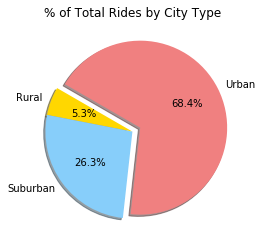

In [16]:
# Total Rides by City Type
rides_count = type_percent['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Images/TotalRidesbyCityType.png")

# Show Figure
plt.show()

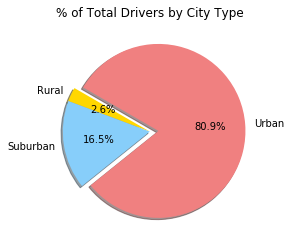

In [17]:
# Total Drivers by City Type
type_groupped_drivers = city_data.groupby(['type'])
drivers_sum = type_groupped_drivers['driver_count'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Images/TotalDriversbyCityType.png")

# Show Figure
plt.show()